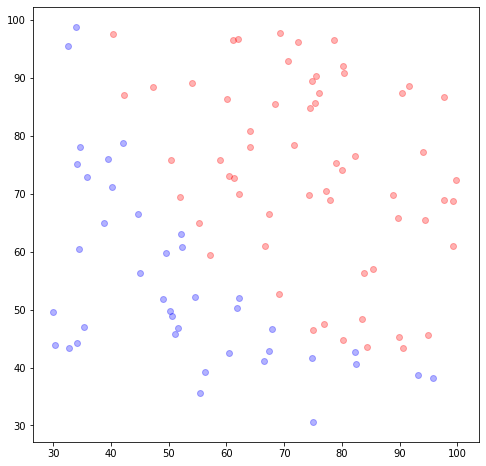

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

x_label0 = np.array(x_label0)
x_label1 = np.array(x_label1)
y_label0 = np.array(y_label0)
y_label1 = np.array(y_label1)



In [2]:
def sigma_z(theta0, theta1, theta2, x, y):
    tmp1 = theta1*x
    tmp2 = theta2*y
    tmp3 = tmp1+tmp2
    z = theta0 + tmp3
    t = (-1.0)*z
    result = 1.0 + np.exp(t)
    return np.reciprocal(result)

def objective(i, sigma_z):
    if(i == 0):
        tmp = 1-sigma_z
        result = np.log(tmp)
        tmp2 = np.sum(result)
        return (-1*tmp2)
    elif(i == 1):
        result = np.log(sigma_z)
        tmp = np.sum(result)
        return (-1*tmp)

def gradient0(sigma_z, i):
    return  np.sum(sigma_z - i)

def gradient1(sigma_z, i, step, x):
    tmp = sigma_z - i
    return  -1*step*np.sum(tmp*x)


    

In [55]:
theta0 = 0.0
theta1 = 0.0
theta2 = 0.0

threshold = 0.63

m0 = x_label0.size
m1 = x_label1.size

step = 0.00001

enough = False
i0 = 0
i1 = 1

theta0_iter = []
theta1_iter = []
theta2_iter = []
count_iter = []
loss_count = []
count = 0
loss_counted = 0 
loss_iter = []

#print(sigma_z(theta0, theta1, theta2, x_label0, y_label0))

while(enough == False):
    sigma0 = sigma_z(theta0, theta1, theta2, x_label0, y_label0)
    #print(sigma0)
    sigma1 = sigma_z(theta0, theta1, theta2, x_label1, y_label1)
    tmp0 = objective(i0, sigma0)
    tmp1 = objective(i1, sigma1)
    loss= (tmp0+tmp1)/(m0+m1)
    loss_counted = loss_counted + 1
    loss_count.append(loss_counted)
    loss_iter.append(loss)
    print(loss)
    if(loss > threshold):
        
        tmp0 = gradient0(sigma0, i0)
        tmp1 = gradient0(sigma1, i1)
        # theta1
        tmp2 = gradient1(sigma0, i0, step,  x_label0)
        tmp3 = gradient1(sigma1, i1, step,  x_label1)
        # theta2
        tmp4 = gradient1(sigma0, i0, step,  y_label0)
        tmp5 = gradient1(sigma1, i1, step,  y_label1)
        
        the0 = theta0 - (((tmp0 + tmp1)/(m0+m1))*step)
        theta0 = the0
        the1 = theta1 + ((tmp2 + tmp3)/(m0+m1))
        theta1 = the1
        the2 = theta2 + ((tmp4 + tmp5)/(m0+m1))
        theta2 = the2
        
        theta0_iter.append(theta0)
        theta1_iter.append(theta1)
        theta2_iter.append(theta2)
        count = count+1
        count_iter.append(count)
        #print(theta0, theta1, theta2)
    elif(loss < threshold):
        enough = True


0.6931471805599453
0.6904669657514486
0.6879064495300511
0.6854602608402174
0.6831232567371837
0.6808905148357185
0.6787573257311198
0.676719185433991
0.6747717878548778
0.6729110173698348
0.6711329414934357
0.6694338036816053
0.6678100162829262
0.6662581536537266
0.664774945449262
0.6633572701006494
0.6620021484848551
0.660706737792962
0.659468325600135
0.6582843241391069
0.657152264777651
0.6560697926993158
0.6550346617857024
0.6540447296976996
0.6530979531523897
0.652192383391741
0.6513261618387186
0.6504975159360632
0.6497047551626796
0.6489462672223513
0.6482205143993369
0.6475260300752852
0.6468614154018559
0.6462253361234128
0.6456165195441682
0.645033751634206
0.644475874268889
0.643941782596238
0.6434304225269892
0.6429407883421547
0.64247192041305
0.6420229030288906
0.6415928623272155
0.6411809643225433
0.6407864130288305
0.6404084486714521
0.6400463459845903
0.6396994125900731
0.639366987453856
0.6390484394165052
0.6387431657941791
0.638450591046762
0.6381701655099495
0.6379

0.6303295977508061
0.6303286672348396
0.6303277381413505
0.6303268104680374
0.6303258842126037
0.6303249593727557
0.6303240359462038
0.6303231139306621
0.6303221933238485
0.6303212741234843
0.6303203563272946
0.6303194399330085
0.6303185249383585
0.6303176113410807
0.6303166991389151
0.6303157883296049
0.6303148789108978
0.6303139708805443
0.6303130642362992
0.6303121589759205
0.6303112550971699
0.6303103525978129
0.6303094514756187
0.6303085517283598
0.6303076533538122
0.6303067563497562
0.6303058607139751
0.6303049664442559
0.6303040735383895
0.6303031819941698
0.630302291809395
0.6303014029818661
0.6303005155093883
0.6302996293897698
0.6302987446208229
0.6302978612003634
0.6302969791262102
0.6302960983961858
0.630295219008117
0.6302943409598329
0.6302934642491671
0.6302925888739564
0.6302917148320409
0.6302908421212646
0.6302899707394745
0.6302891006845216
0.6302882319542601
0.6302873645465478
0.6302864984592457
0.6302856336902186
0.6302847702373346
0.6302839080984655
0.630283047271

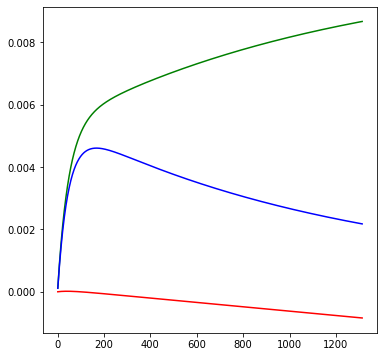

In [56]:
plt.figure(figsize=(6, 6))
plt.plot(count_iter, theta0_iter,  color='r')
plt.plot(count_iter, theta1_iter,  color='g')
plt.plot(count_iter, theta2_iter,  color='b')
plt.show()

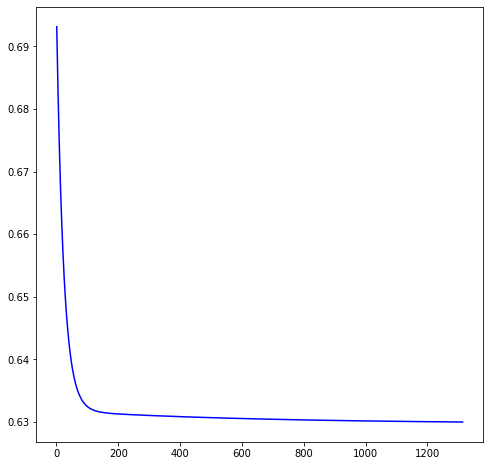

-0.0008400090935220482
0.008673353260934746
0.0021784896214454607


In [57]:
plt.figure(figsize=(8, 8))
plt.plot(loss_count, loss_iter,  color='b' )
plt.show()
print(theta0)
print(theta1)
print(theta2)


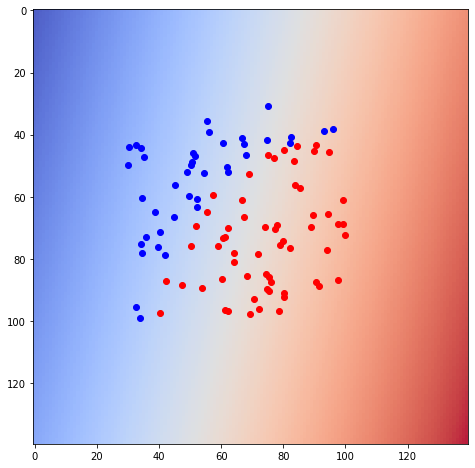

In [58]:
x = np.arange(30, 100, 0.5)
y = np.arange(30, 100, 0.5)


fig = plt.figure(figsize=(8,8))
#ax = fig.gca(projection='3d')

t0, t1 = np.meshgrid(x, y)
z = []
for i in y:
    line = []
    for j in x:
        line.append(theta0 + theta1*j +theta2*i)
    z.append(line)

tz = np.array(z)
plt.imshow(tz,cmap='coolwarm',alpha=0.9)
plt.scatter(x_label0, y_label0, alpha=1, c='b')
plt.scatter(x_label1, y_label1, alpha=1, c='r')
#surf = ax.plot_surface(t0,t1,tz,cmap='coolwarm',linewidth=0,antialiased=True)


#ax.scatter3D(x_label0, y_label0, 0, alpha=0.3, c='b')
#ax.scatter3D(x_label1, y_label1, 1, alpha=0.3, c='r')

plt.show()

